In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Mean Blur

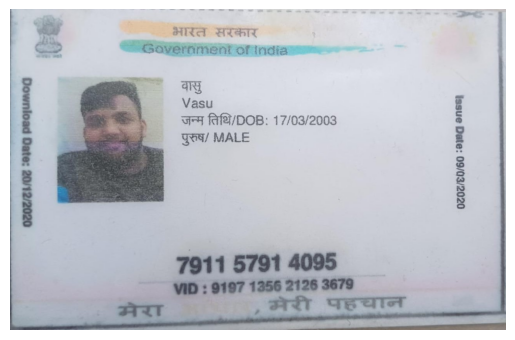

In [3]:
img = cv2.imread("data\\adhar.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

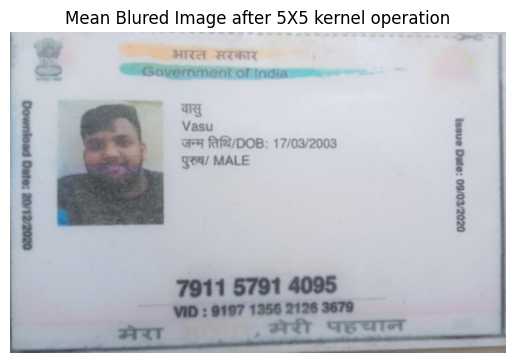

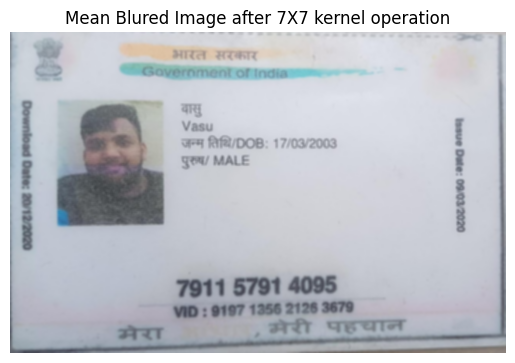

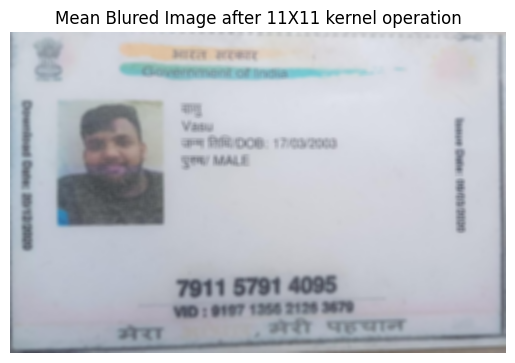

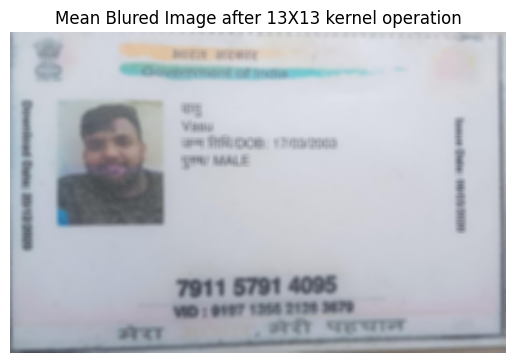

In [4]:
# creating mean filter kernel
def meankernel(size):
    mk = np.ones((size, size), dtype = np.float32)/(size**2)
    return mk

for size in range(3, 14, 2):
    blur_img = cv2.filter2D(img , -1, meankernel(size))
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Mean Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()

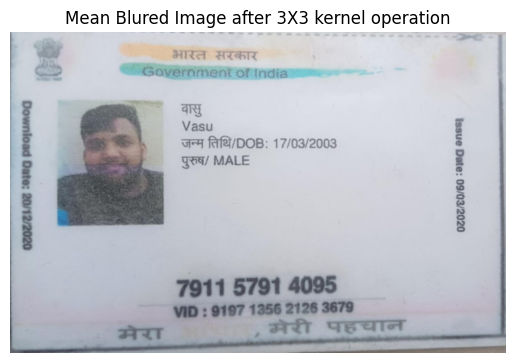

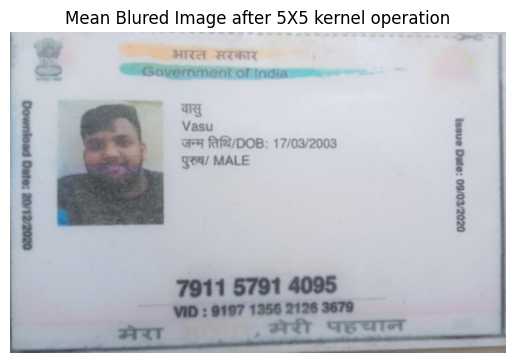

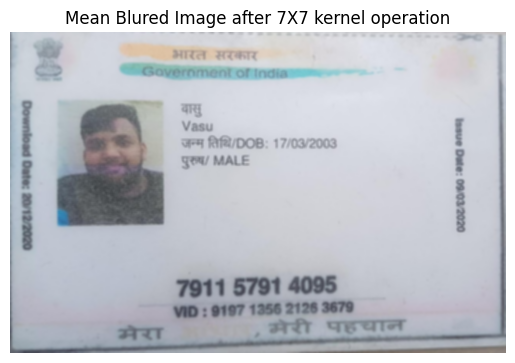

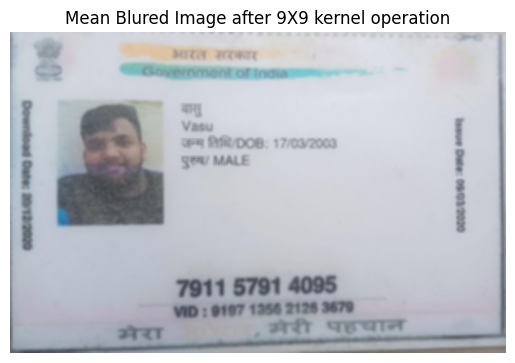

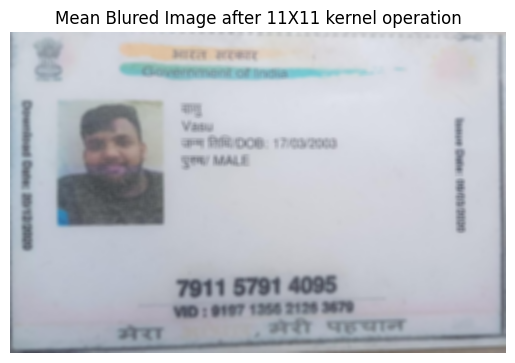

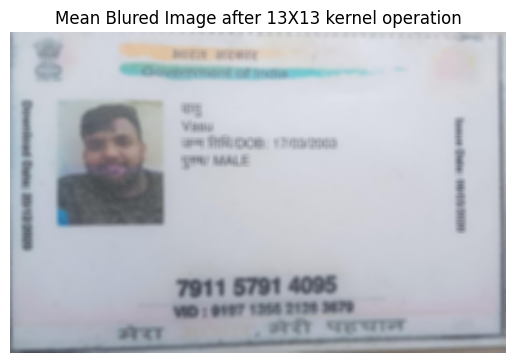

In [5]:
for size in range(3, 14, 2):
    blur_img = cv2.blur(img, (size, size))
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Mean Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()

# Gaussian Blur

In [6]:
import numpy as np

def gaussian_kernel(sigma):
    kernel_size = 3
    kernel = np.zeros((kernel_size, kernel_size))
    center = kernel_size // 2
    normalization_factor = 1 / (2 * np.pi * sigma**2)
    # print(center)

    for i in range(kernel_size):
        for j in range(kernel_size):
            # x and y represent the distance of the current pixel from 
            # the center of the kernel in the horizontal and vertical directions, respectively.
            x = i - center
            y = j - center
            kernel[i, j] = normalization_factor*np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Normalize the kernel
    kernel /= np.sum(kernel)
    
    return kernel

# Example usage
sigma = 0.8
gaussian_kernel_3x3 = gaussian_kernel(sigma)
print("3x3 Gaussian Kernel:")
print(gaussian_kernel_3x3)

3x3 Gaussian Kernel:
[[0.05711826 0.12475775 0.05711826]
 [0.12475775 0.27249597 0.12475775]
 [0.05711826 0.12475775 0.05711826]]


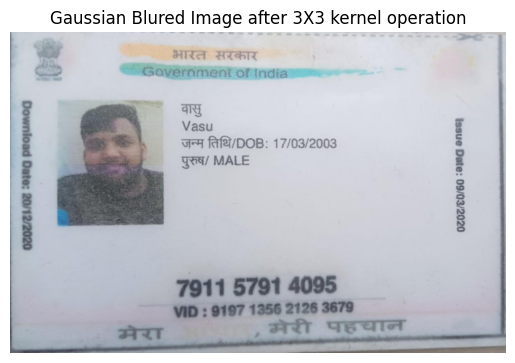

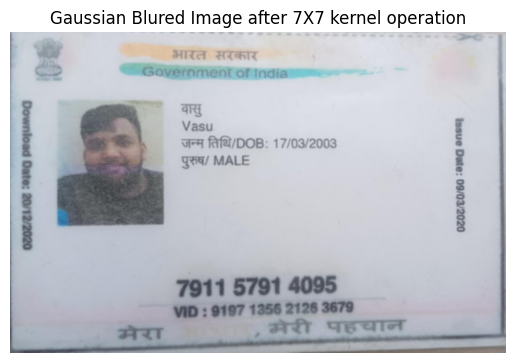

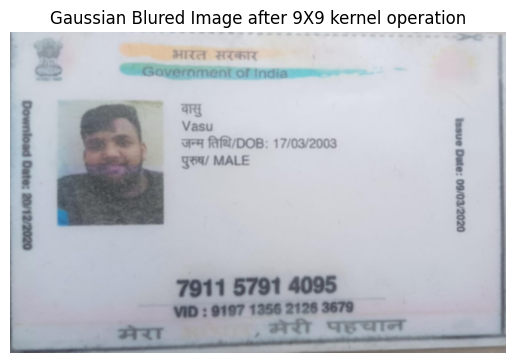

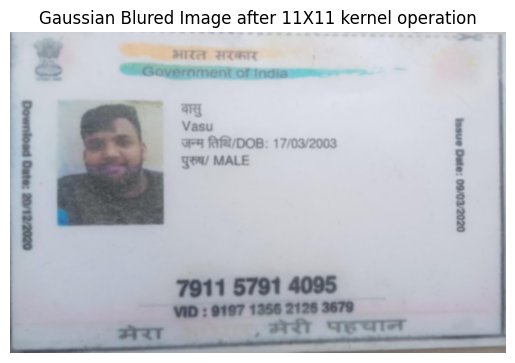

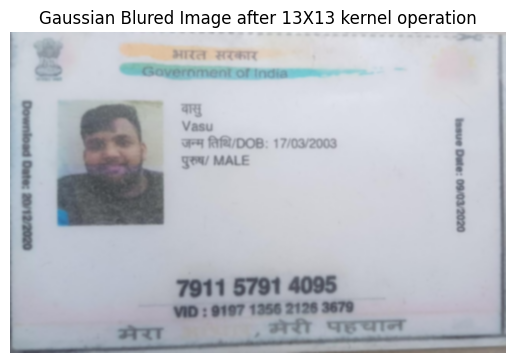

In [7]:
for size in range(3, 14, 2):
    blur_img = cv2.GaussianBlur(img, (size, size), 0)
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Gaussian Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()

# Histogram
## used to understand intensity distribution of a picture means how many times a pixel occurs

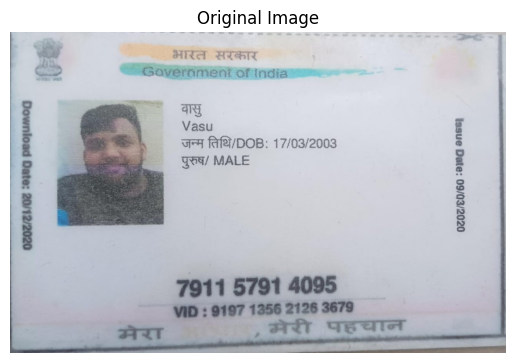

In [8]:
bgr_img = cv2.imread("data\\adhar.jpg")
img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [9]:
img.shape

(828, 1280, 3)

In [10]:
# Total no of pixels in the image
1280*828*3

3179520

In [11]:
# flatten the image 
img.ravel().shape

(3179520,)

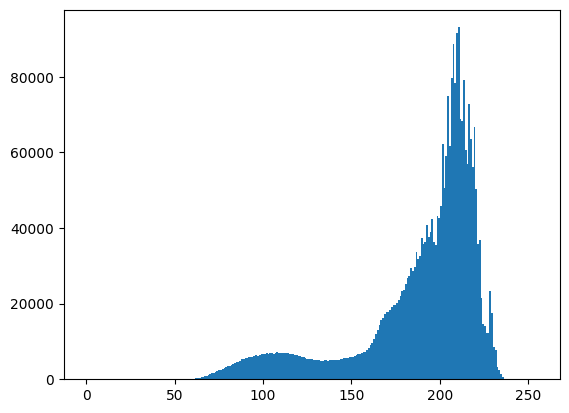

In [12]:
# Histogram 
plt.hist(img.ravel(), bins=256, range=[0,255])
plt.show()


In [13]:
colors = ('b', 'g', 'r')

bgr_img_ravel = [bgr_img[:, :, 0].ravel(), bgr_img[:, :, 1].ravel(), bgr_img[:,:, 2].ravel()]

In [14]:
bgr_img_ravel

[array([147, 150, 162, ..., 128, 130, 131], dtype=uint8),
 array([135, 138, 151, ..., 133, 135, 136], dtype=uint8),
 array([129, 132, 143, ..., 142, 144, 145], dtype=uint8)]

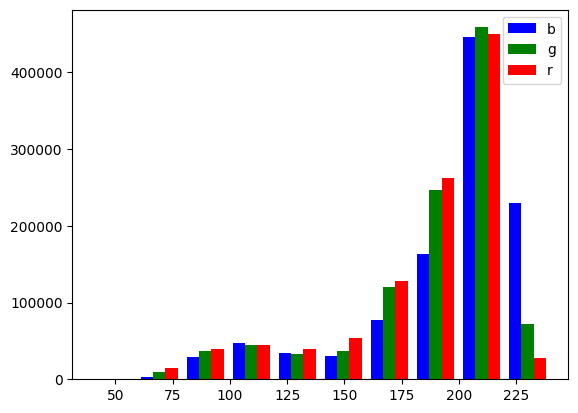

In [15]:
plt.hist(bgr_img_ravel, color=colors, label=colors)
plt.legend()
plt.show()

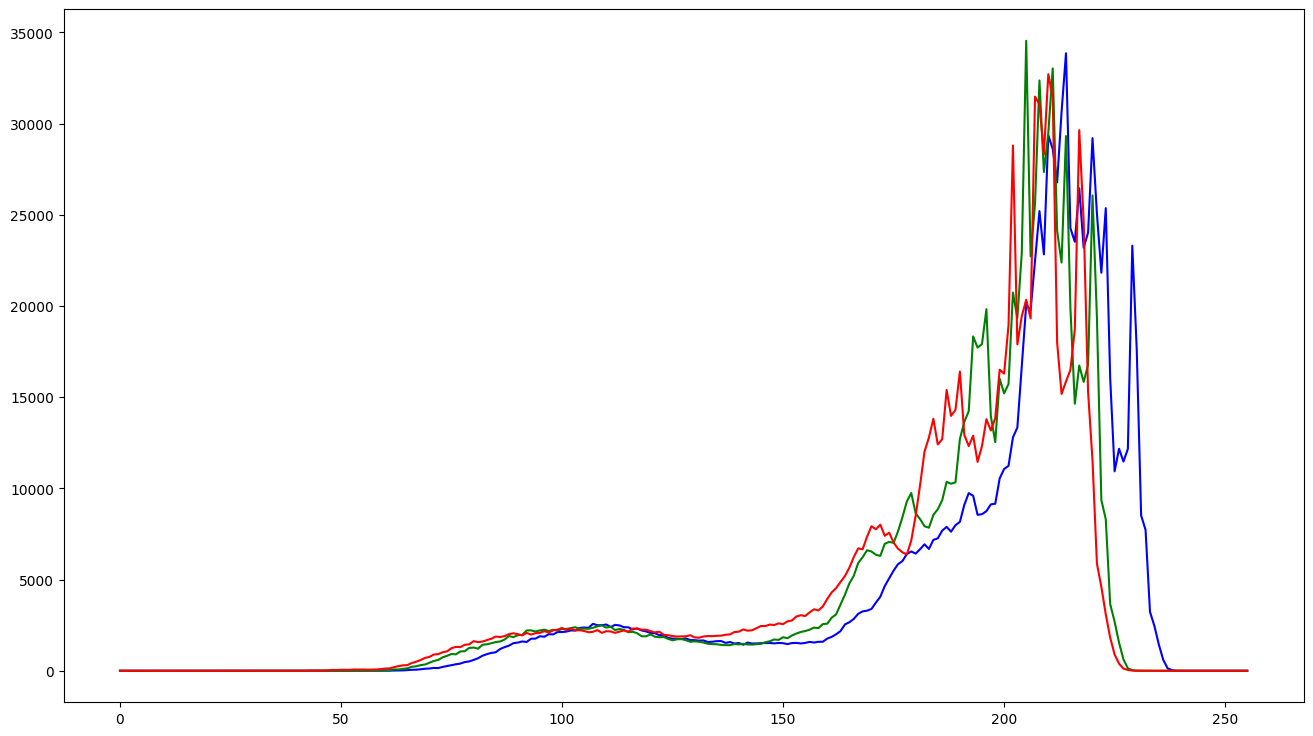

In [16]:
plt.figure(figsize=(16, 9))

for i, color in enumerate(colors):
    histogram = cv2.calcHist([bgr_img], [i], None, [256], [0, 256])
    plt.plot(histogram, color = color)

plt.show()

# Thresholding

### Inverse

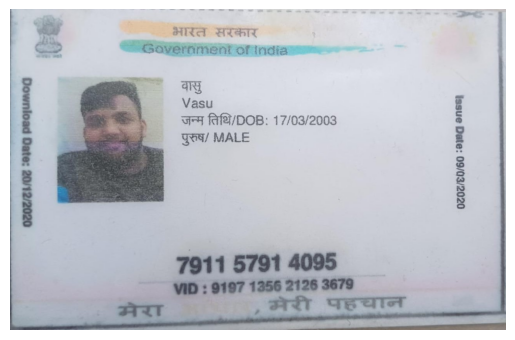

In [17]:
# Reading image
image = cv2.imread("data\\adhar.jpg")
rgb_image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.axis("off")
plt.show()

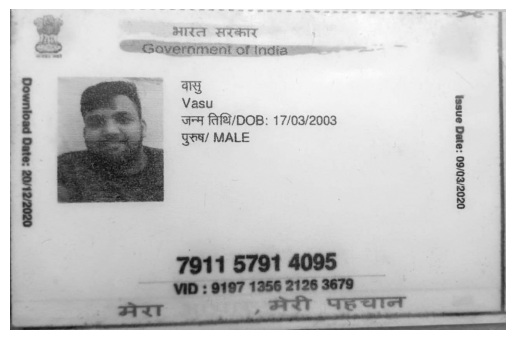

In [18]:
# Gray Scale Conversion

gray =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.show()

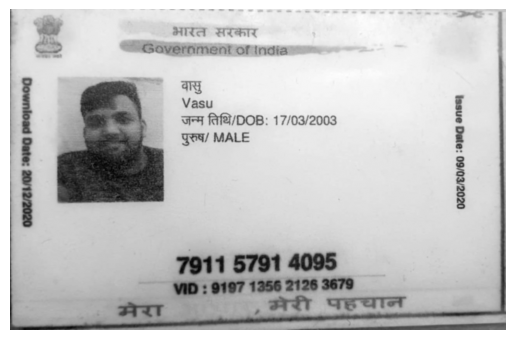

In [19]:
blurred =  cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap='gray')
plt.axis("off")
plt.show()

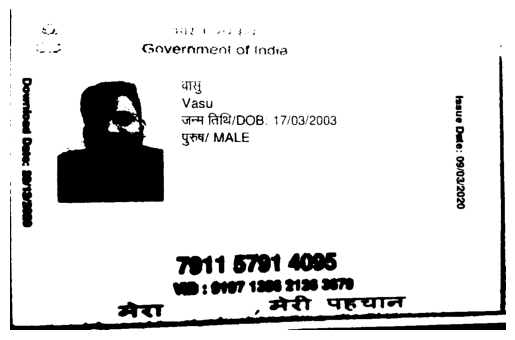

In [20]:
T, thresh =  cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.axis("off")
plt.show()

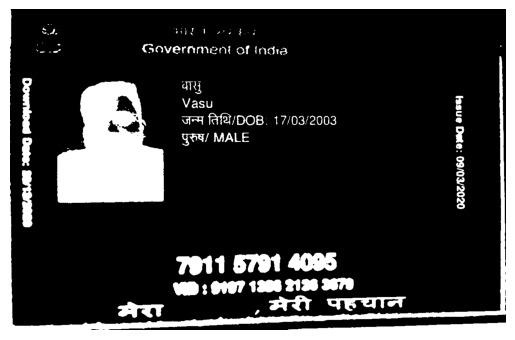

In [21]:
T, threshInv =  cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshInv, cmap='gray')
plt.axis("off")
plt.show()

## Otsu Thresholding

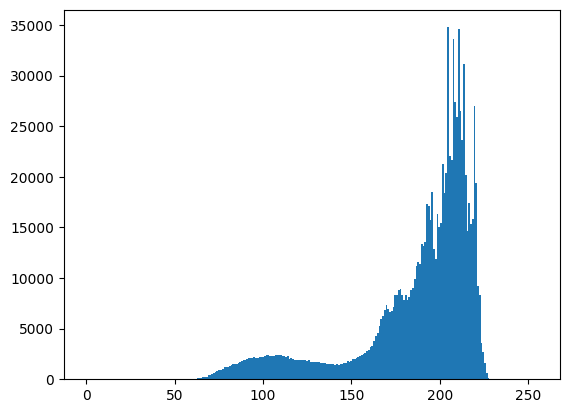

In [22]:
plt.hist(gray.ravel(), bins =  256, range=[0, 255])
plt.show()

In [23]:
(T, otsu_threshInv) = cv2.threshold(blurred, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

print("[INFO] otsu's thresholding value: {}".format(T))

plt.imshow(otsu_threshInv, cmap='Greys_r')
plt.axis("off")
plt.show()

[INFO] otsu's thresholding value: 158.0


# Adaptive Thresholding

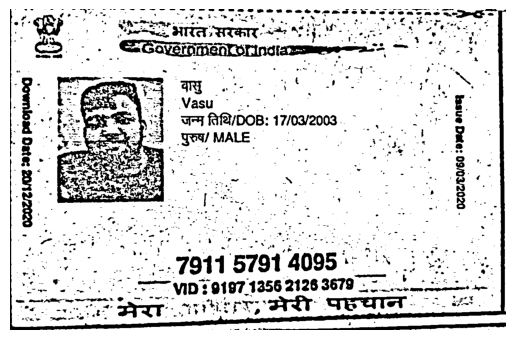

In [24]:
adp_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)

plt.imshow(adp_thresh, cmap='Greys_r')
plt.axis("off")
plt.show()

In [25]:
# image = cv2.imread("data\\photo.jpg")
# gray =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blurred =  cv2.GaussianBlur(gray, (5, 5), 0)
# adp_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)
# plt.imshow(adp_thresh, cmap='Greys_r')
# plt.axis("off")
# plt.show()

# Contour Detection
### What is Contour?
### Contour is a boundary around something that has well defined edges, so the machine is able to calculate difference in gradient, and form a recognisable shape through continuing chnage and draw a boundary around it.

contours (0, 0, 1280, 820)
Area 1003637.5


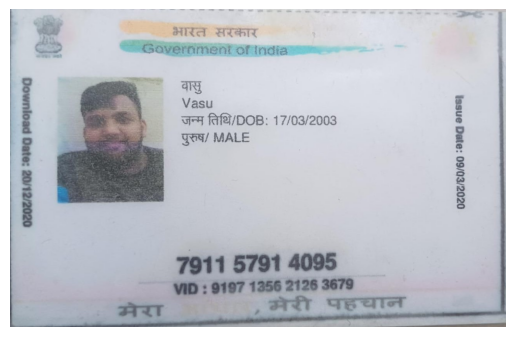

19

In [26]:
contours, _ = cv2.findContours(adp_thresh, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour (assuming the ID card is the largest object)
largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area

x, y, w, h = cv2.boundingRect(largest_contour)

print("contours", (x, y, w, h))
print("Area", largest_area)
contour_id = rgb_image[y:y+h, x:x+w]

plt.imshow(contour_id)
plt.axis('off')
plt.show()

len(contours)

In [27]:
# image = cv2.imread("data\\sample_image1.jpg")
# rgb_image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# gray =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blurred =  cv2.GaussianBlur(gray, (5, 5), 0)
# adp_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)
# contours, _ = cv2.findContours(adp_thresh, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

# # Select the largest contour (assuming the ID card is the largest object)
# largest_contour = None
# largest_area = 0
# for cnt in contours:
#     area = cv2.contourArea(cnt)
#     if area > largest_area:
#         largest_contour = cnt
#         largest_area = area

# x, y, w, h = cv2.boundingRect(largest_contour)

# print("contours", (x, y, w, h))
# print("Area", largest_area)
# contour_id = rgb_image[y:y+h, x:x+w]

# plt.imshow(contour_id)
# plt.axis('off')
# plt.show()

# len(contours)

In [28]:
# img_copy = rgb_image.copy()
# cv2.drawContours(img_copy, contours, -1, (255, 0, 0), 2)
# plt.imshow(img_copy)
# plt.axis('off')
# plt.show()


# OCR

In [29]:
import easyocr

reader = easyocr.Reader(['en'])

result = reader.readtext(contour_id)

result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
d:\Projects\EKYC\ekyc\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[([[np.int32(413), np.int32(40)],
   [np.int32(516), np.int32(40)],
   [np.int32(516), np.int32(80)],
   [np.int32(413), np.int32(80)]],
  'HRd',
  np.float64(0.30492568745611914)),
 ([[np.int32(526), np.int32(46)],
   [np.int32(646), np.int32(46)],
   [np.int32(646), np.int32(78)],
   [np.int32(526), np.int32(78)]],
  'Hhert',
  np.float64(0.12594240010073968)),
 ([[np.int32(334), np.int32(84)],
   [np.int32(723), np.int32(84)],
   [np.int32(723), np.int32(127)],
   [np.int32(334), np.int32(127)]],
  'Gavernment &i India',
  np.float64(0.5568694463621104)),
 ([[np.int32(435), np.int32(180)],
   [np.int32(502), np.int32(180)],
   [np.int32(502), np.int32(224)],
   [np.int32(435), np.int32(224)]],
  '48',
  np.float64(0.36801130102075474)),
 ([[np.int32(28), np.int32(174)],
   [np.int32(60), np.int32(174)],
   [np.int32(60), np.int32(324)],
   [np.int32(28), np.int32(324)]],
  'I',
  np.float64(0.10287549501853821)),
 ([[np.int32(434), np.int32(219)],
   [np.int32(853), np.int32(219)],


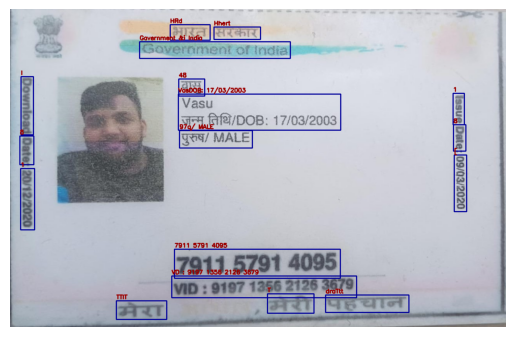

In [30]:
countour_copy =  np.copy(contour_id)

for detection in result:
    bounding_box = detection[0]
    recognized_text = detection[1]
    confidence = detection[2]
    
    # Convert the bounding box points to integers
    x_min, y_min = map(int, bounding_box[0])
    x_max, y_max = map(int, bounding_box[2])
    
    # Draw a rectangle around the text
    cv2.rectangle(countour_copy, (x_min, y_min), (x_max, y_max), (0, 0, 155), 2)
    
    # Put the recognized text on the image
    cv2.putText(countour_copy, recognized_text, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (155, 0, 0), 2)
        

plt.imshow(countour_copy)
plt.axis('off')
plt.show()
        

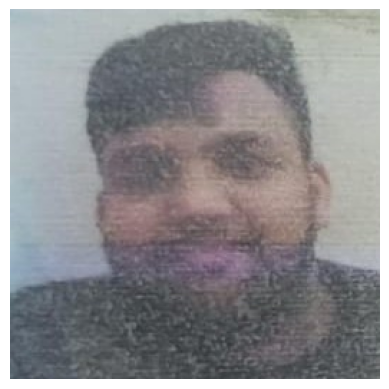

In [34]:
cascade_path = "data\\models\\haarcascade_frontalface_default.xml"

gray_img = cv2.cvtColor(contour_id, cv2.COLOR_BGR2GRAY)

# Load the Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cascade_path)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

faces
# Find the face with the largest area
max_area = 0
largest_face = None
for (x, y, w, h) in faces:
    area = w * h
    if area > max_area:
        max_area = area
        largest_face = (x, y, w, h)

# Extract the largest face
if largest_face is not None:
    (x, y, w, h) = largest_face
    extracted_face = img[y:y+h, x:x+w]
    

    # Increase dimensions by 15%
    new_w = int(w * 1.50)
    new_h = int(h * 1.50)
    
    # Calculate new (x, y) coordinates to keep the center of the face the same
    new_x = max(0, x - int((new_w - w) / 2))
    new_y = max(0, y - int((new_h - h) / 2))

    # Extract the enlarged face
    extracted_face = contour_id[new_y:new_y+new_h, new_x:new_x+new_w]

plt.imshow(extracted_face)
plt.axis('off')
plt.show()

In [35]:
cv2.imwrite("data\\extracted_face.jpg", extracted_face)

True

# Face Comparison

In [4]:
import cv2
import face_recognition

face1 = face_recognition.load_image_file("data\\extracted_face.jpg")
face1 = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

face2 = face_recognition.load_image_file("data\\extracted_face.jpg")
face2 = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

face3 = face_recognition.load_image_file("data\\photo.jpg")
face3 = cv2.cvtColor(face3, cv2.COLOR_BGR2RGB)

#--Converting image into encodings
face_encode1 = face_recognition.face_encodings(face1)[0]
face_encode2 = face_recognition.face_encodings(face2)[0]
face_encode3 = face_recognition.face_encodings(face3)[0]

IndexError: list index out of range

In [13]:
face1 = face_recognition.load_image_file("data\\voter.jpg")
face1 = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)
locations = face_recognition.face_locations(face1)
print("Face locations:", locations)


Face locations: [(528, 617, 795, 349)]
